# Ensemble Techniques - Project 1 - Parkinson's Disease Dataset

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at -   https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/
Links to an external site.
The data consists of those diagnosed with Parkinson Disease and those who do not.

Steps to be followed:

1. Load the dataset

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df = pd.read_csv("parkinsons.data")
df.sample(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.000150,0.01159,0.00990,0.03476,0.06734,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
171,phon_R01_S43_1,112.547,133.374,105.715,0.00355,0.000030,0.00166,0.00190,0.00499,0.01358,...,0.01992,0.00435,26.436,0,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376
33,phon_R01_S07_4,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
39,phon_R01_S08_4,187.733,202.324,173.015,0.00316,0.000020,0.00168,0.00182,0.00504,0.01663,...,0.02488,0.00265,26.310,1,0.396793,0.758324,-6.006647,0.266892,2.382544,0.160691
187,phon_R01_S49_5,116.342,581.289,94.246,0.00267,0.000020,0.00115,0.00148,0.00345,0.01300,...,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
43,phon_R01_S10_2,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,...,0.03017,0.00675,23.145,0,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
90,phon_R01_S21_7,166.605,206.008,78.032,0.00742,0.000040,0.00387,0.00453,0.01161,0.06640,...,0.10949,0.08725,11.744,1,0.653410,0.733165,-4.508984,0.389232,3.317586,0.301952
49,phon_R01_S13_2,122.964,130.049,114.676,0.00428,0.000030,0.00124,0.00155,0.00373,0.01681,...,0.02789,0.00462,24.971,0,0.538688,0.754073,-6.482096,0.264967,2.054419,0.128872
165,phon_R01_S42_1,236.200,244.663,102.137,0.00277,0.000010,0.00154,0.00153,0.00462,0.02448,...,0.04231,0.00620,24.078,0,0.469928,0.628232,-6.816086,0.172270,2.235197,0.119652
145,phon_R01_S34_6,223.361,263.872,87.638,0.00352,0.000020,0.00169,0.00188,0.00506,0.02536,...,0.04137,0.01493,20.366,1,0.566849,0.574282,-5.456811,0.345238,2.840556,0.232861


2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [8]:
df.shape

(195, 24)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)


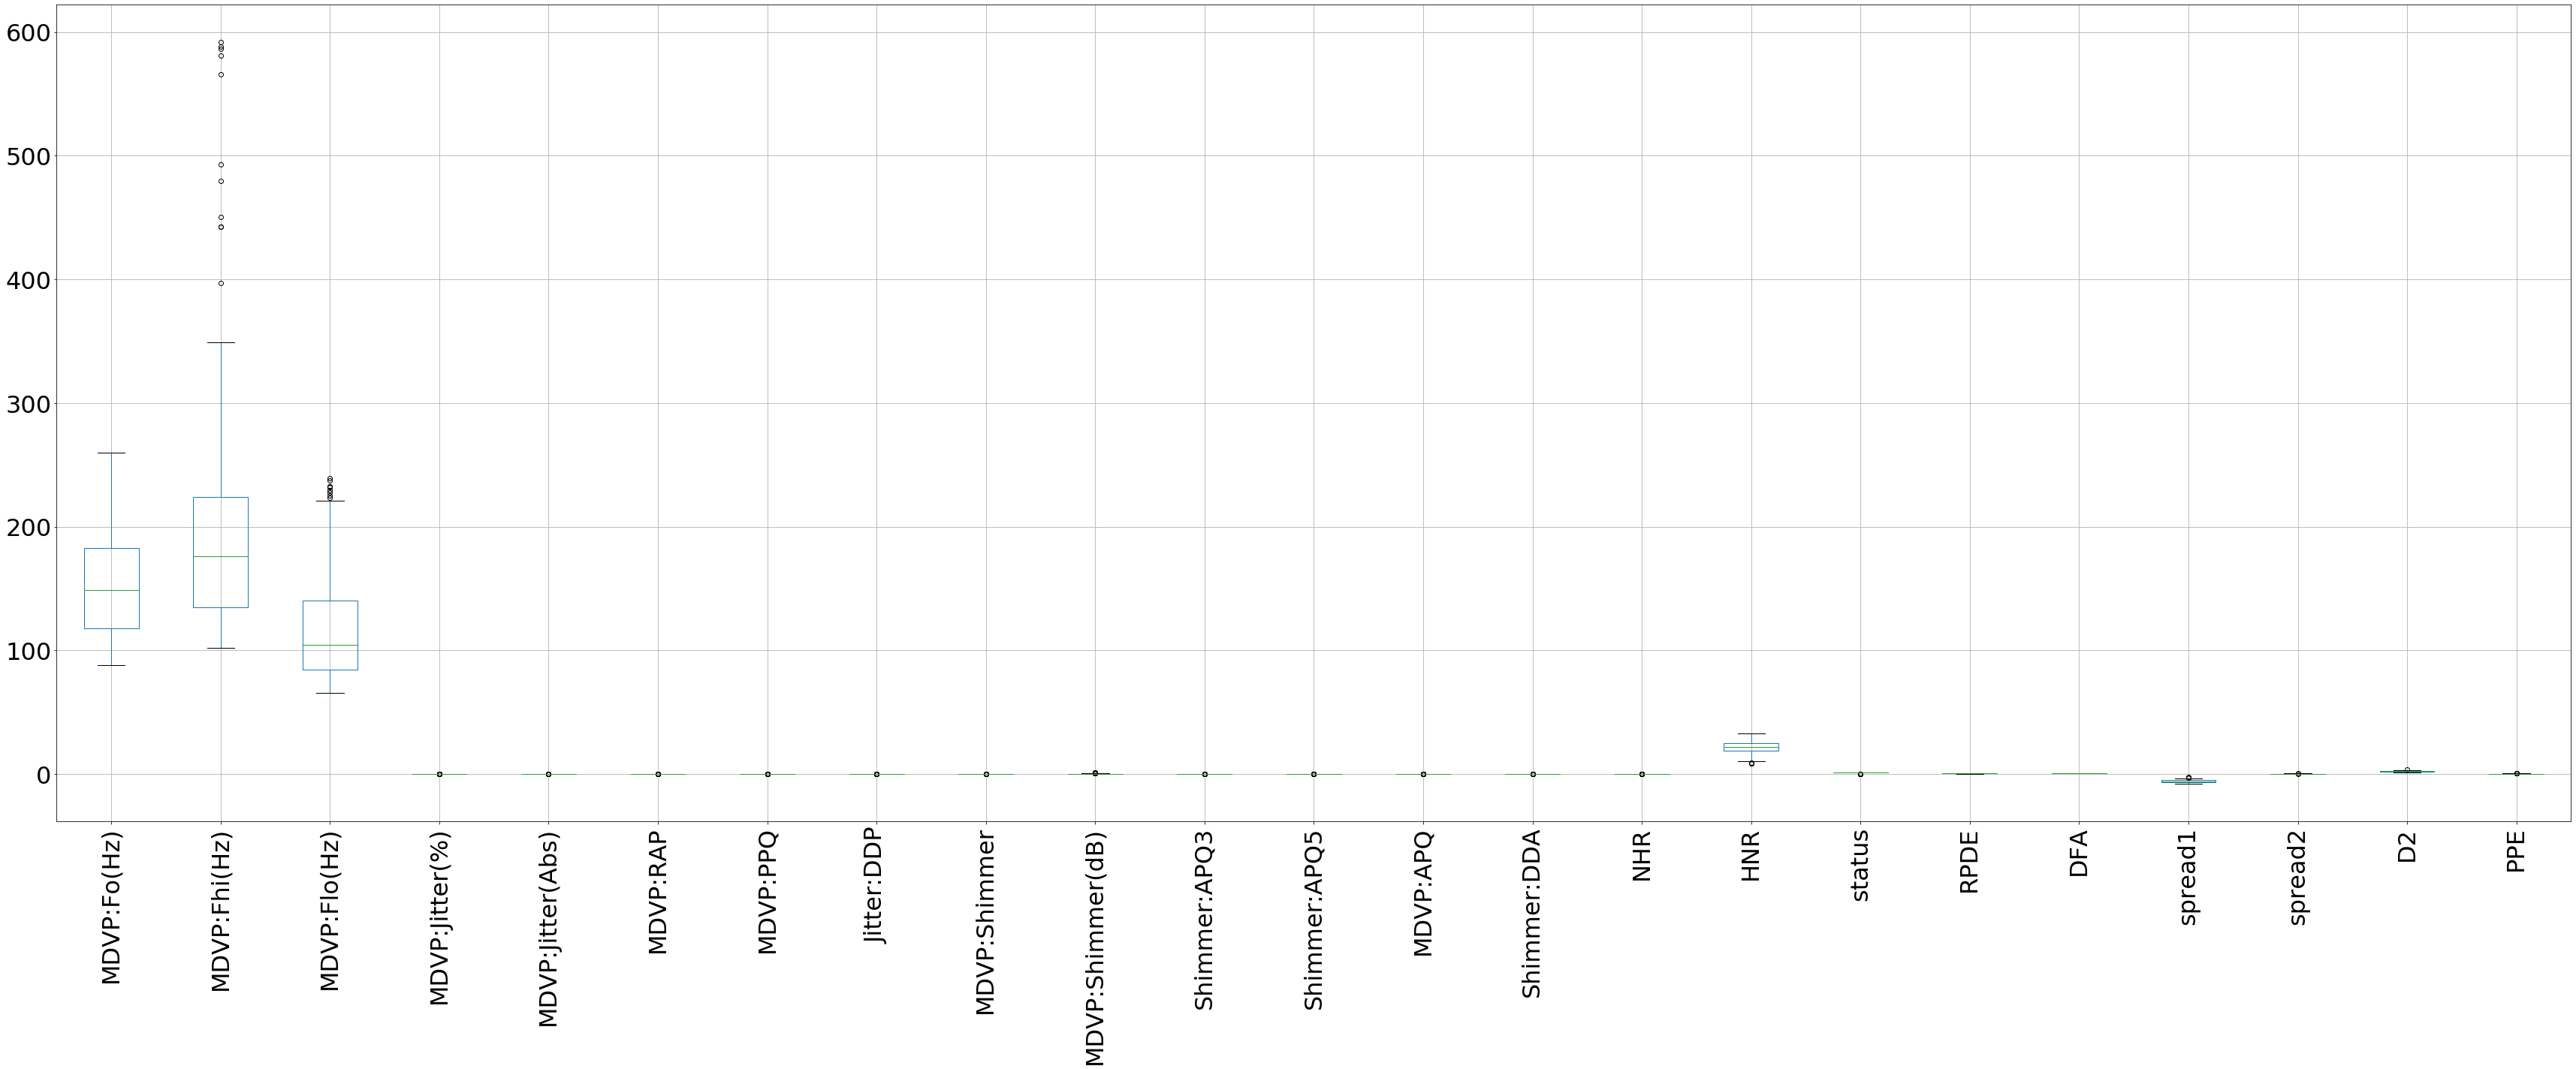

In [14]:
df.boxplot(figsize=(60,20), fontsize=32,rot=90)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


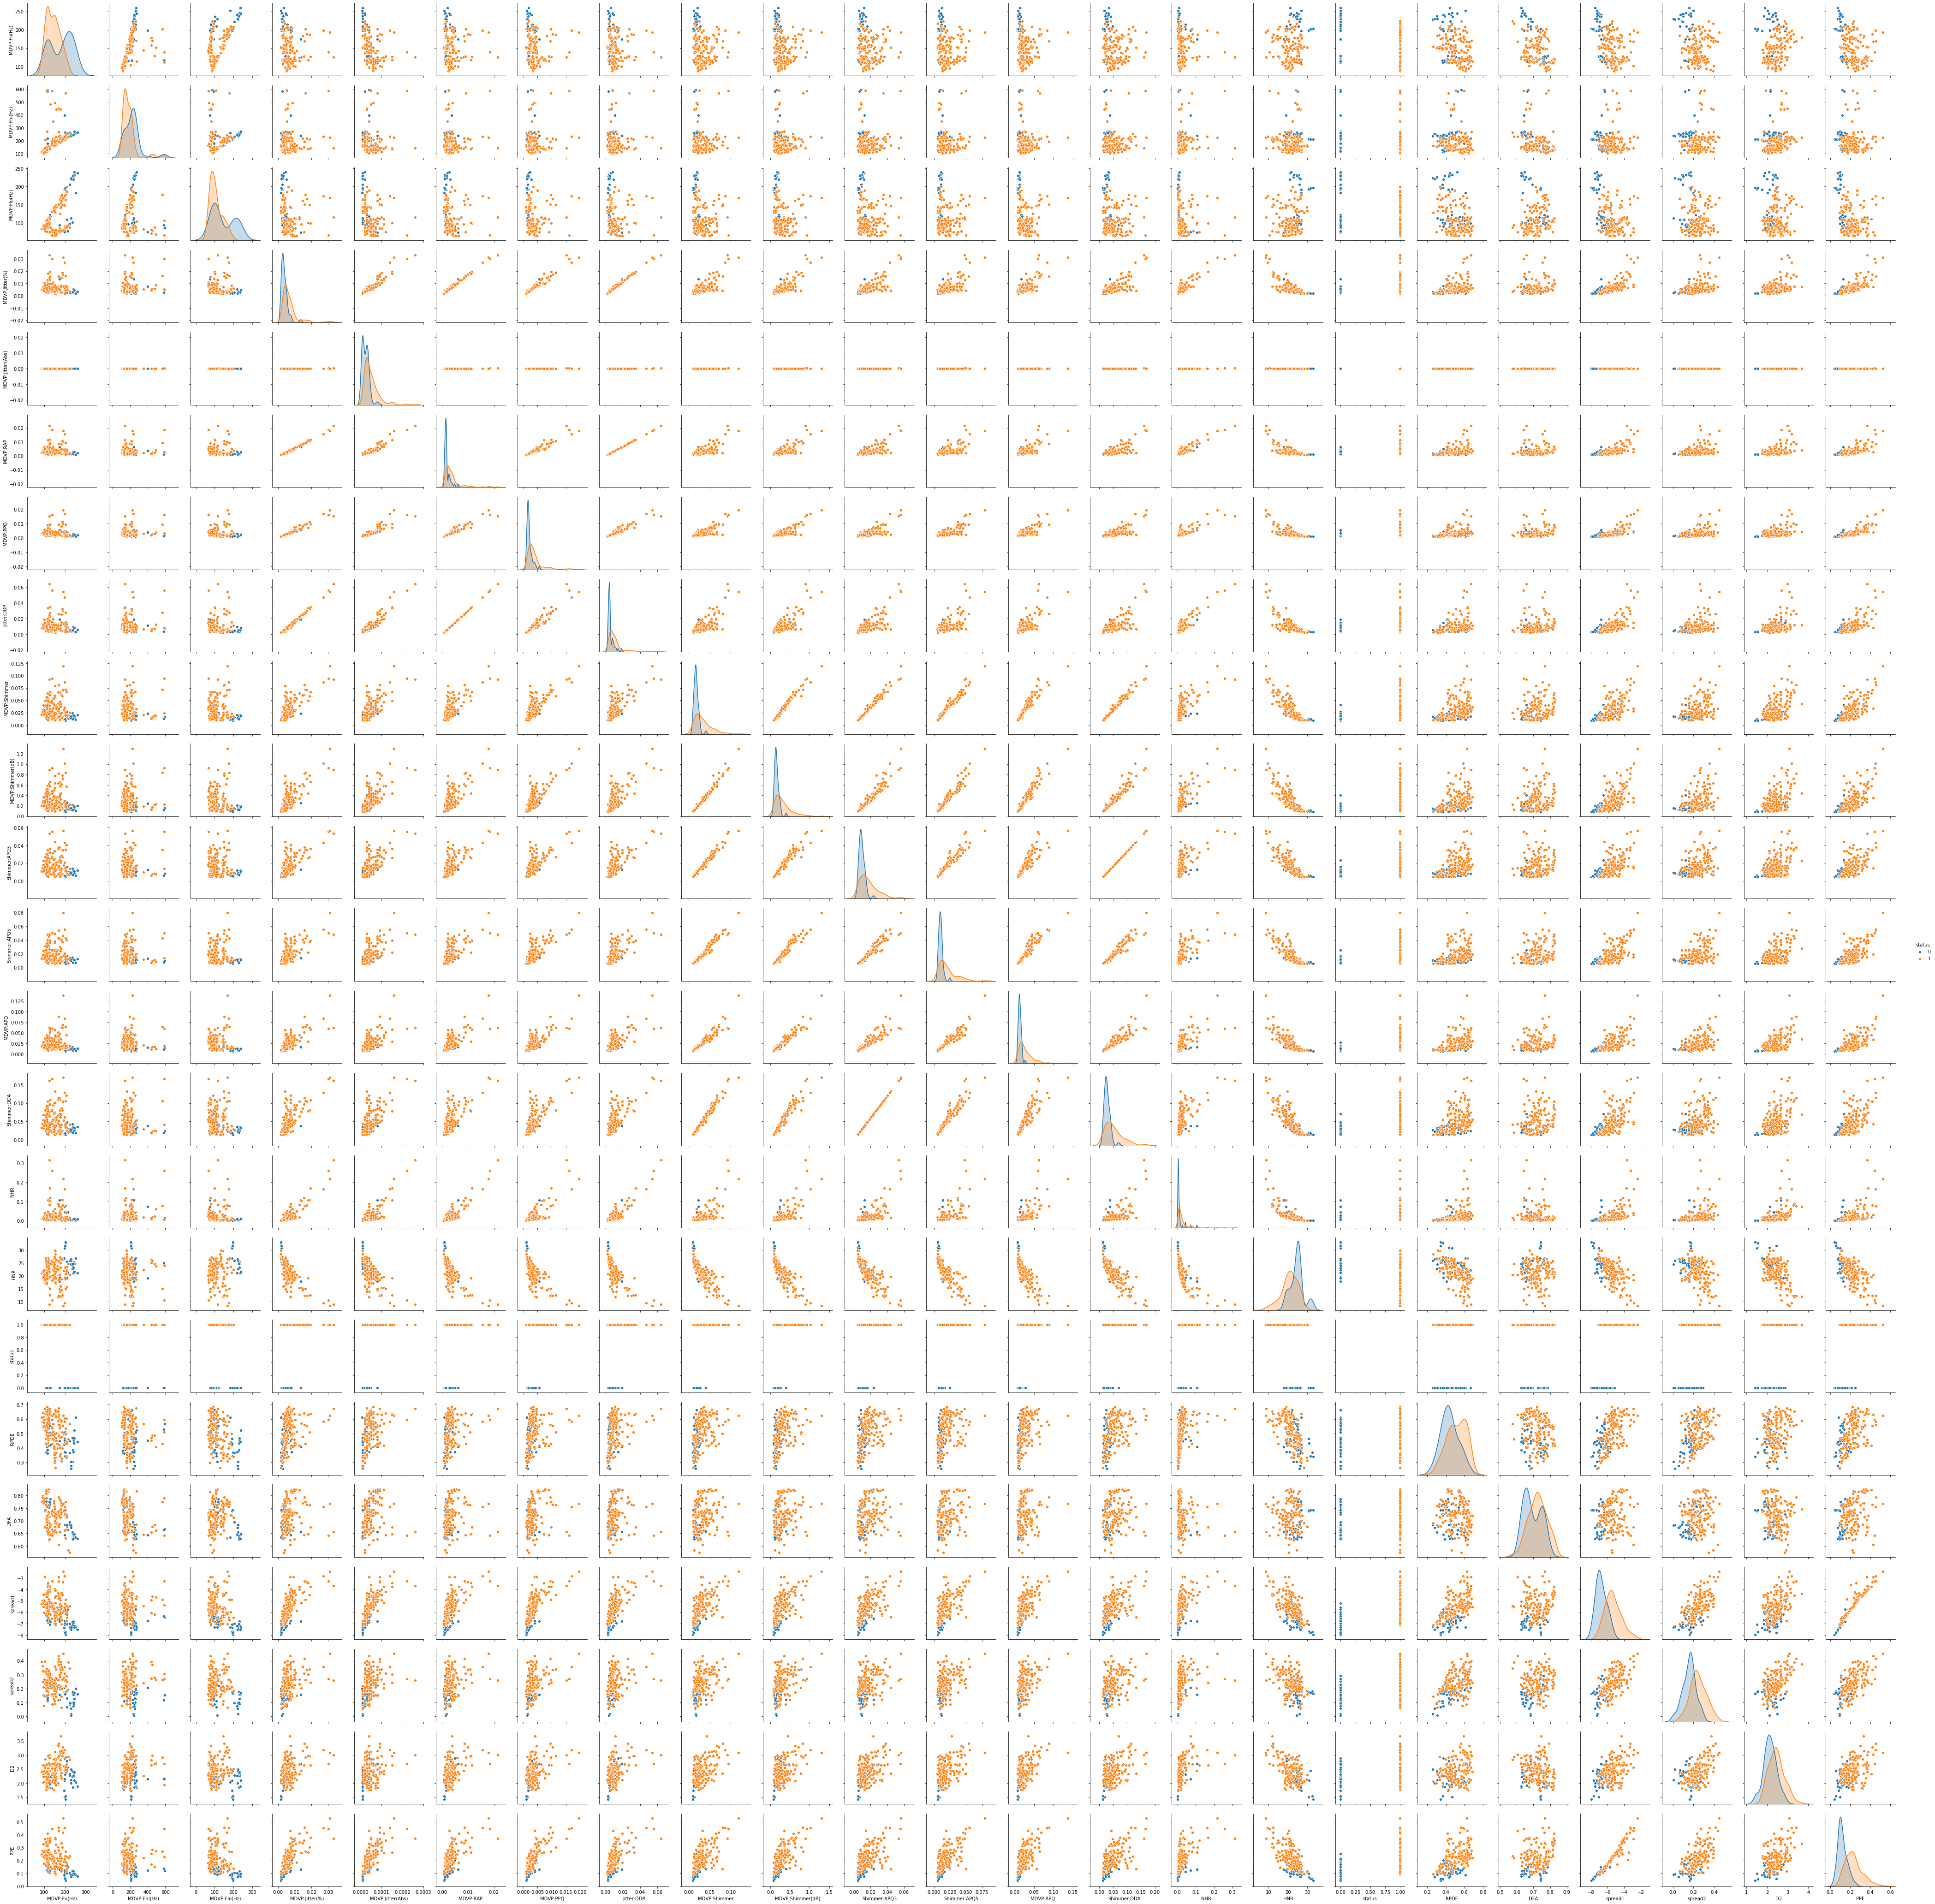

In [9]:
sns.pairplot(df, hue ='status')

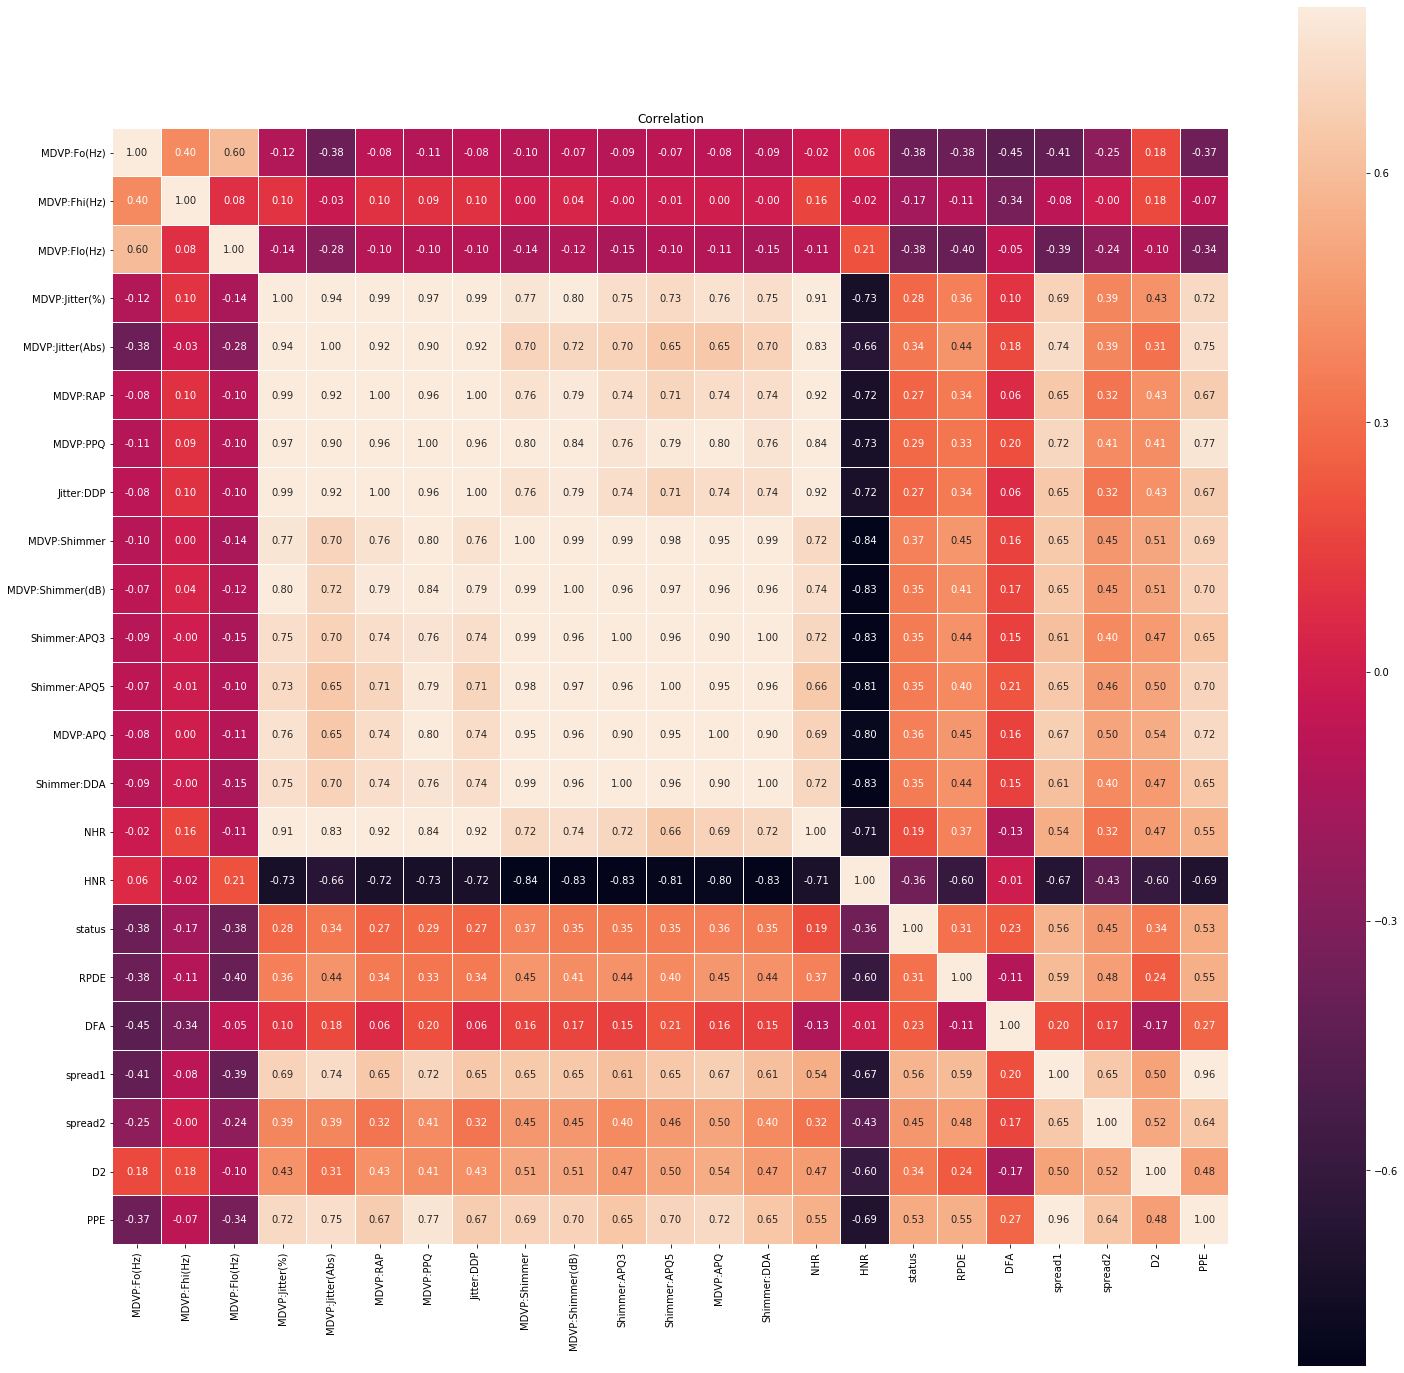

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

In [27]:
#Univariate analysis

df.kurtosis(numeric_only  = True)

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

In [ ]:
#Kurtosis with positive values indicate more datapoints around the tail

In [28]:
df.skew(numeric_only  = True)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [29]:
#Skewness with positive values indicates data is skewed towards right. 
#Skewness with negative values indicates data is skewed towards left.

4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).


In [22]:
y = df['status']
X = df.drop(labels =['status','name'], axis=1)
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)


In [33]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

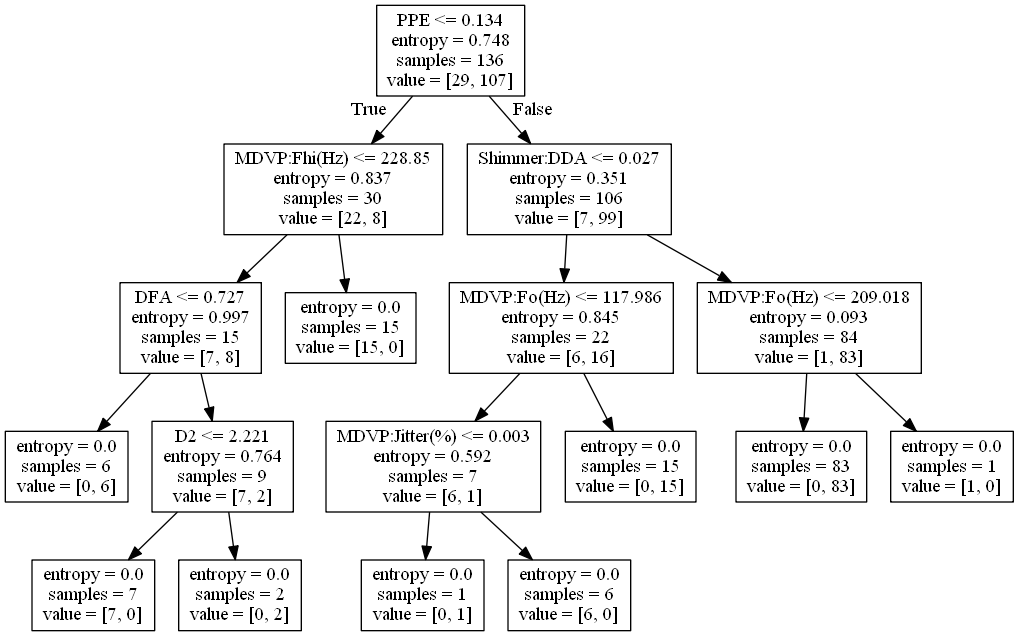

In [34]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Parkinson_File = open('parkinson.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinson_File, feature_names = list(train_set))

Parkinson_File.close()

system("dot -Tpng parkinson.dot -o parkinson.png")
Image("parkinson.png")

6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)


In [35]:
y_predict = dt_model.predict(test_set)

In [36]:
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))

1.0
0.864406779661017


In [38]:
from sklearn import metrics
print(metrics.confusion_matrix(test_labels, y_predict))

[[12  7]
 [ 1 39]]


7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

In [39]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
reg_dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

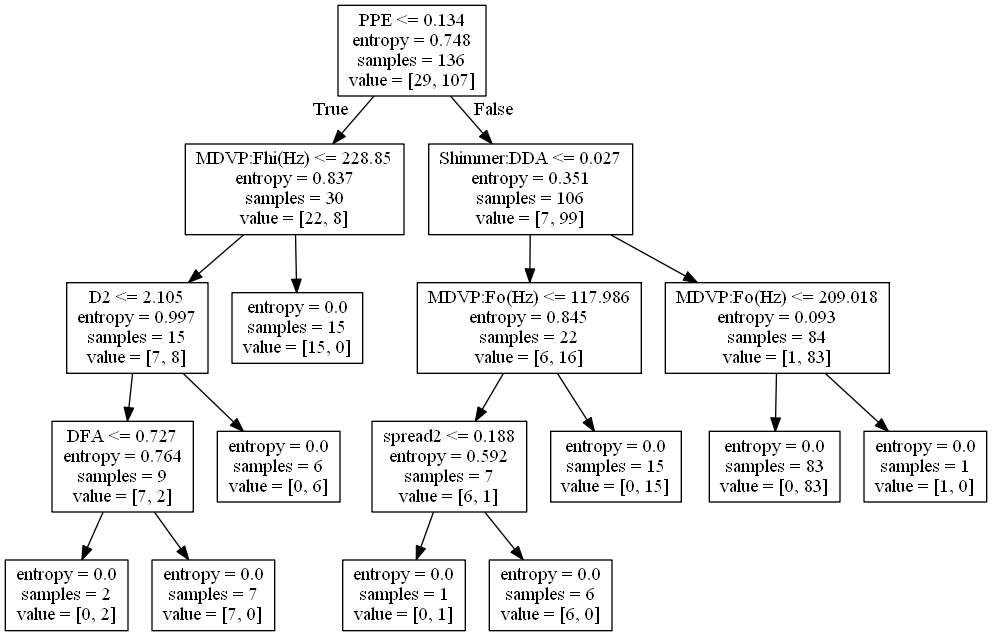

In [40]:
Parkinson_File_reg = open('parkinson_reg.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=Parkinson_File_reg, feature_names = list(train_set))

Parkinson_File_reg.close()

system("dot -Tpng parkinson_reg.dot -o parkinson_reg.png")
Image("parkinson_reg.png")

In [41]:
y_predict = reg_dt_model.predict(test_set)

In [42]:
print(reg_dt_model.score(train_set , train_labels))
print(reg_dt_model.score(test_set , test_labels))

1.0
0.847457627118644


In [43]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[11  8]
 [ 1 39]]


8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [48]:
from sklearn.ensemble import RandomForestClassifier

k_counter = range(1,60)
accuracy = []
k_val =[]

for k in k_counter:
    rfcl = RandomForestClassifier(n_estimators = k)
    rfcl = rfcl.fit(train_set, train_labels)
    y_prediction = rfcl.predict(test_set)
    #knn_score = NNH.score( X_test,y_test)
    accuracy_score = rfcl.score(test_set , test_labels)
    accuracy.append(accuracy_score)
    k_val.append(k)
    print("For k = {} the predicted score is = {} ".format(k, accuracy_score))
    print(metrics.confusion_matrix(test_labels, y_predict))

For k = 1 the predicted score is = 0.7627118644067796 
[[10  9]
 [ 1 39]]
For k = 2 the predicted score is = 0.8305084745762712 
[[10  9]
 [ 1 39]]
For k = 3 the predicted score is = 0.7627118644067796 
[[10  9]
 [ 1 39]]
For k = 4 the predicted score is = 0.8305084745762712 
[[10  9]
 [ 1 39]]
For k = 5 the predicted score is = 0.847457627118644 
[[10  9]
 [ 1 39]]
For k = 6 the predicted score is = 0.8813559322033898 
[[10  9]
 [ 1 39]]
For k = 7 the predicted score is = 0.8813559322033898 
[[10  9]
 [ 1 39]]
For k = 8 the predicted score is = 0.864406779661017 
[[10  9]
 [ 1 39]]
For k = 9 the predicted score is = 0.8983050847457628 
[[10  9]
 [ 1 39]]
For k = 10 the predicted score is = 0.8813559322033898 
[[10  9]
 [ 1 39]]
For k = 11 the predicted score is = 0.864406779661017 
[[10  9]
 [ 1 39]]
For k = 12 the predicted score is = 0.864406779661017 
[[10  9]
 [ 1 39]]
For k = 13 the predicted score is = 0.8983050847457628 
[[10  9]
 [ 1 39]]
For k = 14 the predicted score is = 0.

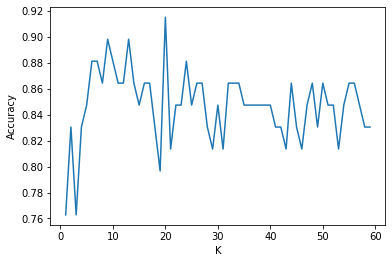

In [49]:
import matplotlib.pyplot as plt
plt.plot(k_val,accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Optimal number of trees giving highest accuracy is 20